## 한글 폰트 설치

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 3s (2,921 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155229 files and d

런타임 다시 시작

## RNN의 문제점

#### 기울기 소실과 기울기 폭발의 원인

[2.4684068094579303]
[2.4684068094579303, 3.335704974161037]
[2.4684068094579303, 3.335704974161037, 4.783279375373183]
[2.4684068094579303, 3.335704974161037, 4.783279375373183, 6.2795873320876145]
[2.4684068094579303, 3.335704974161037, 4.783279375373183, 6.2795873320876145, 8.080776465019055]
[2.4684068094579303, 3.335704974161037, 4.783279375373183, 6.2795873320876145, 8.080776465019055, 10.25116303229294]
[2.4684068094579303, 3.335704974161037, 4.783279375373183, 6.2795873320876145, 8.080776465019055, 10.25116303229294, 12.9360635066099]
[2.4684068094579303, 3.335704974161037, 4.783279375373183, 6.2795873320876145, 8.080776465019055, 10.25116303229294, 12.9360635066099, 16.276861327786712]
[2.4684068094579303, 3.335704974161037, 4.783279375373183, 6.2795873320876145, 8.080776465019055, 10.25116303229294, 12.9360635066099, 16.276861327786712, 20.454829618345983]
[2.4684068094579303, 3.335704974161037, 4.783279375373183, 6.2795873320876145, 8.080776465019055, 10.25116303229294, 12.9

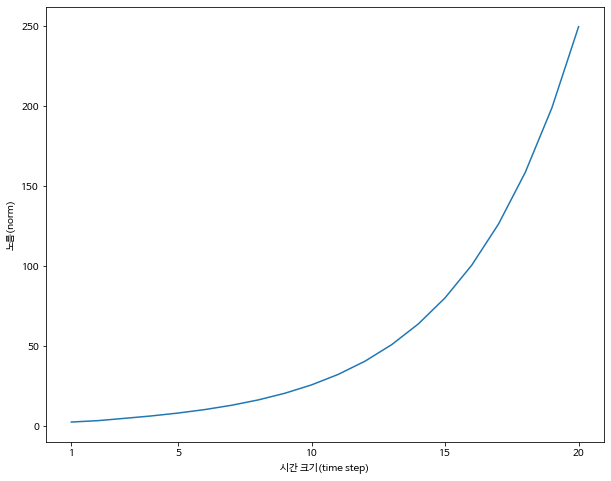

In [1]:
# 역전파 시 MatMul 노드를 지날 때마다 기울기 변화 그래프

import numpy as np
import matplotlib.pyplot as plt

N = 2   # 미니배치 크기
H = 3   # 은닉 상태 벡터의 차원 수
T = 20  # 시계열 데이터의 길이

dh = np.ones((N, H))
np.random.seed(3)       # 재현할 수 있도록 난수의 시드 고정
Wh = np.random.randn(H, H)

norm_list = []
for t in range(T):
  dh = np.matmul(dh, Wh.T)
  norm = np.sqrt(np.sum(dh ** 2)) / N
  norm_list.append(norm)

  print(norm_list)

# 그래프 그리기
plt.rc('font', family = 'NanumBarunGothic')
plt.figure(figsize = (10,8))
plt.plot(np.arange(len(norm_list)), norm_list)
plt.xticks([0, 4, 9, 14, 19], [1, 5, 10, 15, 20])
plt.xlabel('시간 크기(time step)')
plt.ylabel('노름(norm)')
plt.show()

기울기 dh는 시간 크기에 비례하여 지수적으로 증가한다. = **기울기 폭발(exploding gradients)**

[1.2342034047289652]
[1.2342034047289652, 0.8339262435402592]
[1.2342034047289652, 0.8339262435402592, 0.5979099219216478]
[1.2342034047289652, 0.8339262435402592, 0.5979099219216478, 0.3924742082554759]
[1.2342034047289652, 0.8339262435402592, 0.5979099219216478, 0.3924742082554759, 0.25252426453184545]
[1.2342034047289652, 0.8339262435402592, 0.5979099219216478, 0.3924742082554759, 0.25252426453184545, 0.16017442237957719]
[1.2342034047289652, 0.8339262435402592, 0.5979099219216478, 0.3924742082554759, 0.25252426453184545, 0.16017442237957719, 0.10106299614538984]
[1.2342034047289652, 0.8339262435402592, 0.5979099219216478, 0.3924742082554759, 0.25252426453184545, 0.16017442237957719, 0.10106299614538984, 0.06358148956166684]
[1.2342034047289652, 0.8339262435402592, 0.5979099219216478, 0.3924742082554759, 0.25252426453184545, 0.16017442237957719, 0.10106299614538984, 0.06358148956166684, 0.039950839098332]
[1.2342034047289652, 0.8339262435402592, 0.5979099219216478, 0.392474208255475

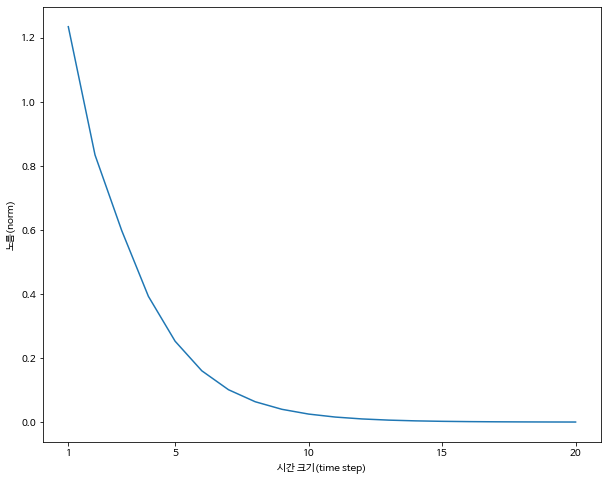

In [2]:
# 역전파 시 MatMul 노드를 지날 때마다 기울기 변화 그래프 - 초깃값 변경

import numpy as np
import matplotlib.pyplot as plt

N = 2   # 미니배치 크기
H = 3   # 은닉 상태 벡터의 차원 수
T = 20  # 시계열 데이터의 길이

dh = np.ones((N, H))
np.random.seed(3)                   # 재현할 수 있도록 난수의 시드 고정
# Wh = np.random.randn(H, H)        # 변경 전
Wh = np.random.randn(H, H)  * 0.5   # 변경 후

norm_list = []
for t in range(T):
  dh = np.matmul(dh, Wh.T)
  norm = np.sqrt(np.sum(dh ** 2)) / N
  norm_list.append(norm)

  print(norm_list)

# 그래프 그리기
plt.rc('font', family = 'NanumBarunGothic')
plt.figure(figsize = (10,8))
plt.plot(np.arange(len(norm_list)), norm_list)
plt.xticks([0, 4, 9, 14, 19], [1, 5, 10, 15, 20])
plt.xlabel('시간 크기(time step)')
plt.ylabel('노름(norm)')
plt.show()

기울기 dh는 시간 크기에 비례하여 지수적으로 감소한다. = **기울기 소실(vanishing gradients)**

#### 기울기 폭발 대책
- 기울기 클리핑

In [3]:
import numpy as np

dW1 = np.random.rand(3, 3) * 10
dW2 = np.random.rand(3, 3) * 10
grads = [dW1, dW2]
max_norm = 5.0

def clip_grads(grads, max_norm):
  total_norm = 0
  for grad in grads:
    total_norm += np.sum(grad ** 2)
  total_norm = np.sqrt(total_norm)

  rate = max_norm / (total_norm + 1e-6)
  if rate < 1:
    for grad in grads:
      grad *= rate

print('before:', dW1.flatten())
clip_grads(grads, max_norm)
print('after:', dW1.flatten())

before: [6.49144048 2.78487283 6.76254902 5.90862817 0.23981882 5.58854088
 2.59252447 4.15101197 2.83525082]
after: [1.49503731 0.64138134 1.55747605 1.36081038 0.05523244 1.28709139
 0.59708178 0.95601551 0.65298384]


## 기울기 소실과 LSTM

In [4]:
%cd /content/drive/MyDrive/colab/deep_learning_basic/밑바닥부터_시작하는_딥러닝2

/content/drive/MyDrive/colab/deep_learning_basic/밑바닥부터_시작하는_딥러닝2


In [5]:
import sys
sys.path.append('..')
from common.np import *
from common.layers import * 
from common.functions import sigmoid

class LSTM:
  def __init__(self, Wx, Wh, b):
    self.params = [Wx, Wh, b]
    self.grads = [np.zeros_like(Wx), np.zeros_like(Wh), np.zeros_like(b)]
    self.cache = None

  def forward(self, x, h_prev, c_prev):
    Wx, Wh, b = self.params
    N, H = h_prev.shape

    A = np.matmul(x, Wx) + np.matmul(h_prev, Wh) + b

    # slice
    f = A[:, :H]
    g = A[:, H:2*H]
    i = A[:, 2*H:3*H]
    o = A[:, 3*H:]

    f = sigmoid(f)
    g = np.tanh(g)
    i = sigmoid(i)
    o = sigmoid(o)

    c_next = f * c_prev + g * i
    h_next = o * np.tanh(c_next)

    self.cache = (x, h_prev, c_prev, i, f, g, o, c_next)
    return h_next, c_next

  def backward(self, dh_next, dc_next):
    Wx, Wh, b = self.params
    x, h_prev, c_prev, i, f, g, o, c_next = self.cache

    tanh_c_next = np.tanh(c_next)

    ds = dc_next + (dh_next * o) * (1 - tanh_c_next ** 2)

    dc_prev = ds * f

    di = ds * g
    df = ds * c_prev
    do = dh_next * tanh_c_next
    dg = ds * i

    di *= i * (1 - i)
    df *= f * (1 - f)
    do *= o * (1 - o)
    dg *= (1 - g ** 2)

    dA = np.hstack((df, dg, di, do))

    dWh = np.dot(h_prev.T, dA)
    dWx = np.dot(x.T, dA)
    db = dA.sum(axis=0)

    self.grads[0][...] = dWx
    self.grads[1][...] = dWh
    self.grads[2][...] = db

    dx = np.dot(dA, Wx.T)
    dh_prev = np.dot(dA, Wh.T)

    return dx, dh_prev, dc_prev

#### Time LSTM 구현

In [6]:
import sys
sys.path.append('..')
from common.np import *
from common.layers import * 
from common.functions import sigmoid
from common.time_layers import LSTM

class TimeLSTM:
  def __init__(self, Wx, Wh, b, stateful = False):
    self.params = [Wx, Wh, b]
    self.grads = [np.zeros_like(Wx), np.zeros_like(Wh), np.zeros_like(b)]
    self.layers = None
    self.h, self.c = None, None
    self.dh = None
    self.stateful = stateful

  def forward(self, xs):
    Wx, Wh, b = self.params
    N, T, D = xs.shape
    H = Wh.shape[0]

    self.layers = []
    hs = np.empty((N, T, H), dtype = 'f')

    if not self.stateful or self.h is None:
      self.h = np.zeros((N, H), dtype = 'f')
    if not self.stateful or self.c is None:
      self.c = np.zeros((N, H), dtype = 'f')

    for t in range(T):
      layer = LSTM(*self.params)
      self.h, self.c = layer.forward(xs[:, t, :], self.h, self.c)
      hs[:, t, :] = self.h

      self.layers.append(layer)

    return hs

  def backward(self, dhs):
    Wx, Wh, b = self.params
    N, T, H = dhs.shape
    D = Wx.shape[0]

    dxs = np.empty((N, T, D), dtype = 'f')
    dh, dc = 0, 0

    grads = [0, 0, 0]
    for t in reversed(range(T)):
      layer = self.layers[t]
      dx, dh, dc = layer.backward(dhs[:, t, :] + dh, dc)
      dxs[:, t, :] = dx
      for i, grad in enumerate(layer.grads):
        grads[i] += grad

    for i, grad in enumerate(grads):
      self.grads[i][...] = grad
    
    self.dh = dh

    return dxs

  def set_state(self, h, c = None):
    self.h, self.c = h, c

  def reset_state(self):
    self.h, self.c = None, None

## LSTM을 사용한 언어 모델

In [7]:
import sys
sys.path.append('..')
from common.time_layers import *
import pickle

class Rnnlm:
  def __init__(self, vocab_size = 10000, wordvec_size = 100, hidden_size = 100):
    V, D, H = vocab_size, wordvec_size, hidden_size
    rn = np.random.randn

    # 가중치 초기화
    embed_W = (rn(V, D) / 100).astype('f')
    lstm_Wx = (rn(D, 4 * H) / np.sqrt(D)).astype('f')
    lstm_Wh = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
    lstm_b = np.zeros(4 * H).astype('f')
    affine_W = (rn(H, V) / np.sqrt(H)).astype('f')
    affine_b = np.zeros(V).astype('f')

    # 계층 생성
    self.layers = [
                   TimeEmbedding(embed_W),
                   TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful = True),
                   TimeAffine(affine_W, affine_b)
    ]
    self.loss_layer = TimeSoftmaxWithLoss()
    self.lstm_layer = self.layers[1]

    # 모든 가중치와 기울기를 리스트에 모은다.
    self.params, self.grads = [], []
    for layer in self.layers:
      self.params += layer.params
      self.grads += layer.grads

  def predict(self, xs):
    for layer in self.layers:
      xs = layer.forward(xs)
    return xs

  def forward(self, xs, ts):
    score = self.predict(xs)
    loss = self.loss_layer.forward(score, ts)
    return loss

  def backward(self, dout = 1):
    dout = self.loss_layer.backward(dout)
    for layer in reversed(self.layers):
      dout = layer.backward(dout)
    return dout
  
  def reset_state(self):
    self.lstm_layer.reset_state()

  def save_params(self, file_name = 'Rnnlm.pkl'):
    with open(file_name, 'wb') as f:
      pickle.dump(self.params, f)

  def load_params(self, file_name = 'Rnnlm.pkl'):
    with open(file_name, 'rb') as f:
      self.params = pickle.load(f)

| 에폭 1 |  반복 1 / 1327 | 시간 0[s] | 퍼플렉서티 9999.69
| 에폭 1 |  반복 21 / 1327 | 시간 6[s] | 퍼플렉서티 2965.94
| 에폭 1 |  반복 41 / 1327 | 시간 12[s] | 퍼플렉서티 1249.82
| 에폭 1 |  반복 61 / 1327 | 시간 17[s] | 퍼플렉서티 958.72
| 에폭 1 |  반복 81 / 1327 | 시간 23[s] | 퍼플렉서티 790.49
| 에폭 1 |  반복 101 / 1327 | 시간 28[s] | 퍼플렉서티 677.08
| 에폭 1 |  반복 121 / 1327 | 시간 33[s] | 퍼플렉서티 656.53
| 에폭 1 |  반복 141 / 1327 | 시간 39[s] | 퍼플렉서티 614.50
| 에폭 1 |  반복 161 / 1327 | 시간 44[s] | 퍼플렉서티 559.23
| 에폭 1 |  반복 181 / 1327 | 시간 49[s] | 퍼플렉서티 592.74
| 에폭 1 |  반복 201 / 1327 | 시간 55[s] | 퍼플렉서티 518.58
| 에폭 1 |  반복 221 / 1327 | 시간 60[s] | 퍼플렉서티 502.97
| 에폭 1 |  반복 241 / 1327 | 시간 65[s] | 퍼플렉서티 449.20
| 에폭 1 |  반복 261 / 1327 | 시간 70[s] | 퍼플렉서티 478.13
| 에폭 1 |  반복 281 / 1327 | 시간 75[s] | 퍼플렉서티 449.74
| 에폭 1 |  반복 301 / 1327 | 시간 81[s] | 퍼플렉서티 398.21
| 에폭 1 |  반복 321 / 1327 | 시간 86[s] | 퍼플렉서티 344.24
| 에폭 1 |  반복 341 / 1327 | 시간 92[s] | 퍼플렉서티 409.38
| 에폭 1 |  반복 361 / 1327 | 시간 97[s] | 퍼플렉서티 409.36
| 에폭 1 |  반복 381 / 1327 | 시간 102[s] | 퍼플렉서티 340.97
| 에폭

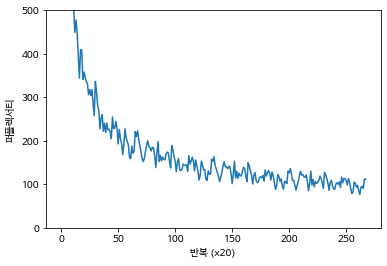

퍼플렉서티 평가 중 ...
234 / 235
테스트 퍼플렉서티: 136.73481461114343


In [8]:
# 학습
import sys
sys.path.append('..')
from common.optimizer import SGD
from common.trainer import RnnlmTrainer
from common.util import eval_perplexity
from dataset import ptb
from ch06.rnnlm import Rnnlm

# 하이퍼파라미터 설정
batch_size = 20
wordvec_size = 100
hidden_size = 100   # RNN의 은닉 상태 벡터의 원소 수
time_size = 35      # RNN을 펼치는 크기
lr = 20.0
max_epoch = 4
max_grad = 0.25

# 학습 데이터 읽기
corpus, word_to_id, id_to_word = ptb.load_data('train')
corpus_test, _, _ = ptb.load_data('test')
vocab_size = len(word_to_id)
xs = corpus[:-1]
ts = corpus[1:]

# 모델 생성
model = Rnnlm(vocab_size, wordvec_size, hidden_size)
optimizer = SGD(lr)
trainer = RnnlmTrainer(model, optimizer)

# 기울기 클리핑을 적용하여 학습
trainer.fit(xs, ts, max_epoch, batch_size, time_size, max_grad, eval_interval = 20)
trainer.plot(ylim = (0, 500))

# 테스트 데이터로 평가
model.reset_state()
ppl_test = eval_perplexity(model, corpus_test)
print('테스트 퍼플렉서티:', ppl_test)

# 매개변수 저장
model.save_params()

## RNNLM 추가 개선

1. LSTM 계층의 다층화(여기에서는 2층)
2. 드롭아웃 사용(깊이 방향으로만 적용)
3. 가중치 공유(Embedding 계층과 Affine 계층에서 가중치 공유)

In [8]:
import sys
sys.path.append('..')
from common.time_layers import *
from common.np import *
from common.base_model import BaseModel

class BetterRnnlm(BaseModel):
  def __init__(self, vocab_size = 10000, wordvec_size = 650,
               hidden_size = 650, dropout_ratio = 0.5):
    V, D, H = vocab_size, wordvec_size, hidden_size
    rn = np.random.randn

    embed_W = (rn(V, D) / 100).astype('f')
    lstm_Wx1 = (rn(D, 4 * H) / np.sqrt(D)).astype('f')
    lstm_Wh1 = (rn(D, 4 * H) / np.sqrt(D)).astype('f')
    lstm_b1 = np.zeros(4 * H).astype('f')
    lstm_Wx2 = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
    lstm_Wh2 = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
    lstm_b2 = np.zeros(4 * H).astype('f')
    affine_b = np.zeros(V).astype('f')

    # 세가지 개선
    self.layers = [
                   TimeEmbedding(embed_W),
                   TimeDropout(dropout_ratio),
                   TimeLSTM(lstm_Wx1, lstm_Wh1, lstm_b1, stateful = True),
                   TimeDropout(dropout_ratio),
                   TimeLSTM(lstm_Wx2, lstm_Wh2, lstm_b2, stateful = True),
                   TimeDropout(dropout_ratio),
                   TimeAffine(embed_W.T, affine_b)      # 가중치 공유                  
    ]
    self.loss_layer = TimeSoftmaxWithLoss()
    self.lstm_layers = [self.layers[2], self.layers[4]]
    self.drop_layers = [self.layers[1], self.layers[3], self.layers[5]]

    self.params, self.grads = [], []
    for layer in self.layers:
      self.params += layer.params
      self.grads += layer.grads

  def predict(self, xs, train_flg = False):
    for layer in self.drop_layers:
      layer.train_flg = train_flg
    for layer in self.layers:
      xs = layer.forward(xs)
    return xs

  def forward(self, xs, ts, train_flg = True):
    score = self.predict(xs, train_flg)
    loss = self.loss_layer.forward(score, ts)
    return loss

  def backward(self, dout = 1):
    dout = self.loss_layer.backward(dout)
    for layer in reversed(self.layers):
      dout = layer.backward(dout)
    return dout

  def reset_state(self):
    for layer in self.lstm_layers:
      layer.reset_state()

In [ ]:
import sys
sys.path.append('..')
from common import config
from common.optimizer import SGD
from common.trainer import RnnlmTrainer
from common.util import eval_perplexity
from dataset import ptb
from ch06.better_rnnlm import BetterRnnlm

# 하이퍼파라미터 설정
batch_size = 20
wordvec_size = 650
hidden_size = 650
time_size = 35
lr = 20.0
max_epoch = 40
max_grad = 0.25
dropout = 0.5

# 학습 데이터 읽기
corpus, word_to_id, id_to_word = ptb.load_data('train')
corpus_val, _, _ = ptb.load_data('val')
corpus_test, _, _ = ptb.load_data('test')

vocab_size = len(word_to_id)
xs = corpus[:-1]
ts = corpus[1:]

model = BetterRnnlm(vocab_size, wordvec_size, hidden_size, dropout)
optimizer = SGD(lr)
trainer = RnnlmTrainer(model, optimizer)

best_ppl = float('inf')
for epoch in range(max_epoch):
  trainer.fit(xs, ts, max_epoch = 1, batch_size = batch_size, time_size = time_size, max_grad = max_grad)
  model.reset_state()
  ppl = eval_perplexity(model, corpus_val)
  print('검증 퍼플렉서티: ', ppl)

  if best_ppl > ppl:
    best_ppl = ppl
    model.save_params()
  else:
    lr /= 4.0
    optimizer.lr = lr

  model.reset_state()
  print('-'*50)

## 정리

- 단순한 RNN의 학습에서는 기울기 소실과 기울기 폭발이 문제가 된다.
- 기울기 폭발에는 기울기 클리핑, 기울기 소실에는 게이트가 추가된 RNN(LSTM과 GRU 등)이 효과적이다.
- LSTM에는 input 게트, forget 게이트, output 게이트 등 3개의 게이트가 있따.
- 게이트에는 전용 가중치가 있으며, 시그모이드 함수를 사용하여 0.0 ~ 1.0 사이의 실수를 출력한다.
- 언어 모델 개선에는 LSTM 계층 다층화, 드롭아웃, 가중치 공유 등의 기법이 효과적이다.
- RNN의 정규화는 중요한 주제이며, 드롭아웃 기반의 다양한 기법이 제안되고 있다.